<a href="https://colab.research.google.com/github/shahinmabdulla/shahinfdp/blob/main/DL_NETWORK_SHAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/FDPAISETML')

In [3]:

pwd


'/content/drive/MyDrive/FDPAISETML'

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
mnist_data=tf.keras.datasets.mnist

In [6]:
(X_train,y_train),(X_test,y_test)=mnist_data.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[0]

5

<function matplotlib.pyplot.show(*args, **kw)>

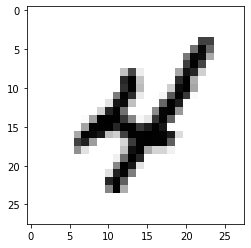

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[9],cmap="binary")
plt.show

In [11]:
y_train[9]

4

In [12]:
import seaborn as sns

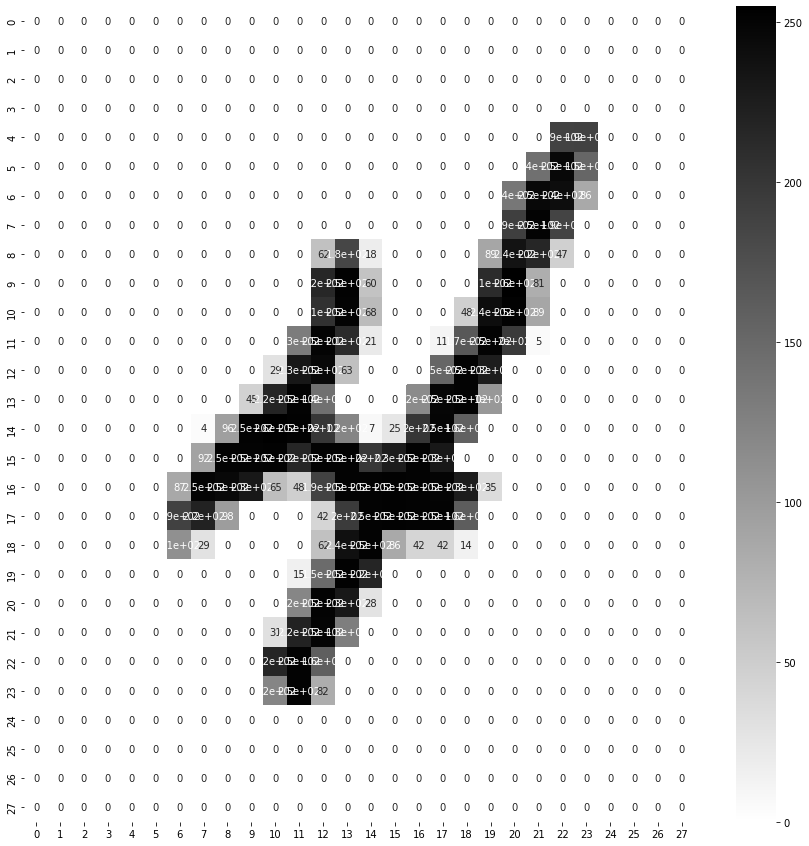

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9],annot=True,cmap="binary")

In [14]:
X_train=X_train/255
X_test=X_test/255
#scaling

In [15]:
X_valid,X_train=X_train[:5000],X_train[5000:]
y_valid,y_train=y_train[:5000],y_train[5000:]
#validation dividing training data to mtest and validation

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_train.shape

(55000, 28, 28)

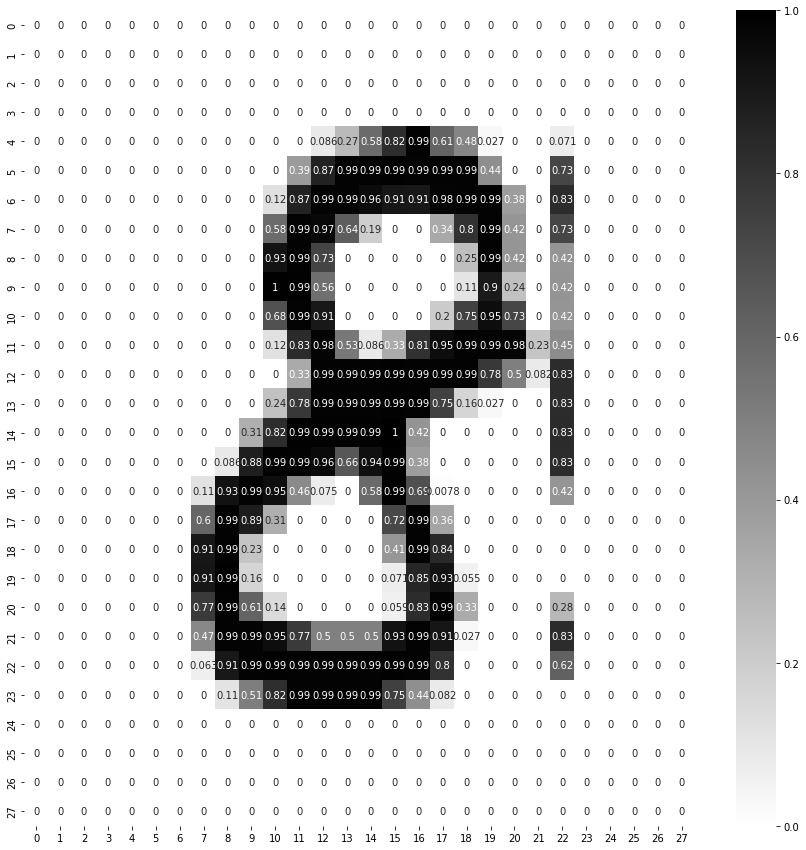

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9],annot=True,cmap="binary")

In [19]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="output")]
        #DEFINING INPUT,HIDEN AND OUTPUT LAYERS
        #10=10 digits

In [20]:
model1=tf.keras.models.Sequential(LAYERS)
#CREATING MODEL

In [21]:
model1.summary()
#display tabular description of network architecture
#784=28*28
#parameters=weights and bias#784*300+300
#connection between layers=30100

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="adam"
METRICS="accuracy"
#loss function

In [23]:
model1.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [24]:
model1.layers
#acess to every layers

In [25]:
model1.layers[0].name#name of first layer

'inputlayer'

In [26]:
model1.layers[1].name

'hiddenlayer1'

In [27]:
hidden1=model1.layers[1]  
w,b = hidden1.get_weights()

In [28]:
w

array([[ 0.00980172, -0.05357543, -0.02140402, ..., -0.00966999,
        -0.01268993,  0.0644491 ],
       [ 0.01437028, -0.05182905,  0.02220982, ...,  0.05428444,
         0.05931389,  0.07265016],
       [-0.00837271,  0.04995563, -0.02454805, ..., -0.05854453,
        -0.0399976 ,  0.07383816],
       ...,
       [-0.01888725,  0.0647801 , -0.00428108, ..., -0.04222358,
        -0.04106594, -0.02292818],
       [-0.01704311,  0.07240254, -0.06265882, ...,  0.01418117,
         0.02547958, -0.02063878],
       [ 0.06868334,  0.04792477,  0.06543179, ..., -0.02204022,
        -0.06137927,  0.06658134]], dtype=float32)

In [29]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
Epochs=10
validation_set=(X_valid,y_valid)

In [31]:
history=model1.fit(X_train,y_train,epochs=Epochs,validation_data=validation_set)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.2082 - accuracy: 0.9369 - val_loss: 0.1023 - val_accuracy: 0.9670
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0858 - accuracy: 0.9727 - val_loss: 0.1334 - val_accuracy: 0.9622
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9814 - val_loss: 0.0901 - val_accuracy: 0.9746
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9860 - val_loss: 0.0837 - val_accuracy: 0.9768
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9888 - val_loss: 0.0795 - val_accuracy: 0.9778
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0821 - val_accuracy: 0.9798
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9922 - val_loss: 0.0801 - val_accuracy

In [36]:
prediction=model1.predict(X_test[1])

1/1 [==============================] - 0s 47ms/step


In [37]:
prediction
#probability 1 represent  probability of first input  to be 1

array([[4.9960365e-18, 2.8109762e-10, 1.0000000e+00, 3.3580517e-15,
        2.2332987e-27, 2.1677920e-21, 3.8242845e-19, 6.4866710e-18,
        1.5103090e-17, 6.3059233e-27]], dtype=float32)

In [38]:
np.argmax(prediction)#predicted value

2

In [39]:
y_test[0]#actual value

7

In [40]:
model1.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[1.77900980e-16, 8.66374819e-11, 1.58857493e-11, ...,
        1.00000000e+00, 7.31775480e-14, 1.74635140e-09],
       [4.99603648e-18, 2.81097617e-10, 1.00000000e+00, ...,
        6.48667095e-18, 1.51030904e-17, 6.30592335e-27],
       [4.30189331e-14, 9.99999762e-01, 4.89066287e-11, ...,
        2.20632117e-07, 3.80196097e-09, 8.17678217e-12],
       ...,
       [5.29576906e-30, 3.86003378e-18, 4.61901568e-23, ...,
        3.34351835e-15, 3.08198860e-17, 5.15859707e-12],
       [2.13739141e-19, 6.67757570e-13, 4.24268885e-20, ...,
        6.48021946e-13, 1.34208321e-05, 3.71798458e-13],
       [6.54550997e-17, 7.33008321e-27, 3.28349667e-20, ...,
        4.09402401e-27, 1.01372115e-19, 5.95744726e-21]], dtype=float32)

In [41]:
test_accuracy=model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9818
